In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tf1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
(X_train,Y_train),(X_val,Y_val)=tf.keras.datasets.mnist.load_data()
print("shape of features matrix:",X_train.shape)
print("shape of target matrix:",Y_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
shape of features matrix: (60000, 28, 28)
shape of target matrix: (60000,)


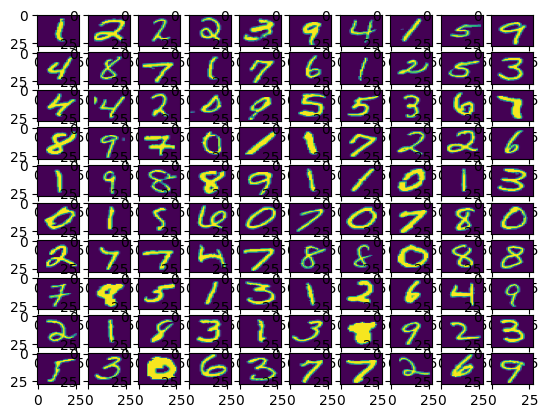

In [6]:
fig,ax=plt.subplots(10,10)
for i in range(10):
  for j in range(10):
    k=np.random.randint(0,X_train.shape[0])
    ax[i][j].imshow(X_train[k].reshape(28,28),aspect='auto')
plt.show()


In [7]:
num_features=784
num_labels=10
learning_rate=0.05
batch_size=128
num_steps=5001
train_dataset=X_train.reshape(-1,784)
train_labels=pd.get_dummies(Y_train).values
valid_dataset=X_val.reshape(-1,784)
valid_labels=pd.get_dummies(Y_val).values

In [8]:
graph=tf.Graph()
with graph.as_default():
  tf_train_dataset=tf1.placeholder(tf.float32,shape=(batch_size,num_features))
  tf_train_labels=tf1.placeholder(tf.float32,shape=(batch_size,num_labels))
  tf_valid_dataset=tf.constant(valid_dataset)
  weights=tf.Variable(tf.random.truncated_normal([num_features,num_labels]))
  biases=tf.Variable(tf.zeros([num_labels]))
  logits=tf.matmul(tf_train_dataset,weights)+biases
  loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels,logits=logits))
  optimizer=tf1.train.GradientDescentOptimizer(learning_rate).minimize(loss)
  train_prediction=tf.nn.softmax(logits)
  tf_valid_dataset=tf.cast(tf_valid_dataset,tf.float32)
  valid_prediction=tf.nn.softmax(tf.matmul(tf_valid_dataset,weights)+biases)
def accuracy(predictions,labels):
  correctly_predicted=np.sum(np.argmax(predictions,1)==np.argmax(labels,1))
  acc=(100.0*correctly_predicted)/predictions.shape[0]
  return acc
with tf1.Session(graph=graph) as session:
  tf1.global_variables_initializer().run()
  print("Initialized")
  for step in range(num_steps):
    offset = np.random.randint(0, train_labels.shape[0] - batch_size - 1)
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset: batch_data,tf_train_labels: batch_labels}
    _, l, predictions = session.run([optimizer, loss, train_prediction],feed_dict=feed_dict)
    if (step % 500 == 0):
      print("Minibatch loss at step {0}: {1}".format(step, l))
      print("Minibatch accuracy: {:.1f}%".format(accuracy(predictions, batch_labels)))
      print("Validation accuracy: {:.1f}%".format(accuracy(valid_prediction.eval(), valid_labels)))

Initialized
Minibatch loss at step 0: 2994.77734375
Minibatch accuracy: 9.4%
Validation accuracy: 34.5%
Minibatch loss at step 500: 662.212646484375
Minibatch accuracy: 86.7%
Validation accuracy: 87.3%
Minibatch loss at step 1000: 530.3905639648438
Minibatch accuracy: 85.2%
Validation accuracy: 90.2%
Minibatch loss at step 1500: 580.85107421875
Minibatch accuracy: 85.9%
Validation accuracy: 90.3%
Minibatch loss at step 2000: 507.6960754394531
Minibatch accuracy: 90.6%
Validation accuracy: 89.2%
Minibatch loss at step 2500: 891.2183837890625
Minibatch accuracy: 84.4%
Validation accuracy: 84.0%
Minibatch loss at step 3000: 403.94305419921875
Minibatch accuracy: 91.4%
Validation accuracy: 86.6%
Minibatch loss at step 3500: 620.08203125
Minibatch accuracy: 85.9%
Validation accuracy: 86.2%
Minibatch loss at step 4000: 725.864501953125
Minibatch accuracy: 83.6%
Validation accuracy: 78.6%
Minibatch loss at step 4500: 366.0262451171875
Minibatch accuracy: 89.8%
Validation accuracy: 89.7%
Minib